In [2]:
import random as rand
import time
import matplotlib.pyplot as plt
import numpy as np
#use pandas to set data as df. ??

In [3]:
# trouble shoot
#subexpr1 = abnormalSignAnalytics(mydict,50)
#print(type(subexpr1), subexpr1)
#print()
#subexpr2 = subexpr1[heldguess]
#print(type(subexpr2), subexpr2)
#if heldguess in currentguess:
    #print("btw,  {} already exists".format(heldguess))
    #print("before:", type(currentguess[heldguess]), currentguess[heldguess])

Phase 1:

In [3]:
#new_dict = {n:[a,b,c,d,e,f,g],n:[a,b,c,d,e,f,g]}
         
def myHealthcare(n):
    mydict = {} 
    #t1 = time.time()
    rand.seed(404)
    #creating several lists to store generated data.
    temp = []
    hr = []
    pulse = []
    bloodpr = []
    resrate = []
    oxsat = []
    pH = []
    
    for i in range(n):
        #generate data using rand function, which is then appended to their respective lists. 
        temp.append(rand.randint(36,39))
        hr.append(rand.randint(55,100))
        pulse.append(rand.randint(55,100))
        bloodpr.append(rand.randint(120,121))
        resrate.append(rand.randint(11,17))
        oxsat.append(rand.randint(93,100))
        pH.append((round(rand.uniform(7.1,7.6),1)))  
       
    for i in range(n): 
        mydict[i]=[temp[i]] #iterates through temp and creates a dictionary with key i as timestamp. 
        mydict[i].extend([hr[i],pulse[i],bloodpr[i],resrate[i],oxsat[i],pH[i]]) 
        
        #add multiple values to each key.
    
    return mydict

In [16]:
mydict=myHealthcare(1000)
#dict(list(mydict.items())[0:5])

Phase 2

a) Find abnormal values for pulse or blood pressure.

o Select a small sample e.g.50 records and count the instances where a vital sign was out of the normal range for a selected value. 

Return selected values for each timestamp. Example output for pulse with 3 abnormal values could be [pulse, 3, [[105,56], [109,57], [125,59]]] or {“ abnormal_pulse_count”: 3, “abnormal_values”: [[105,56], [109,57], [125,59]]}, where [105,56] is [timestamp,value]. Feel free to create your own data structure.



In [17]:
#2a
#Linear search O(n)
#dict2 to store values searched from previous dict. 'abnormal_values' stores multiple ts and abnormal 
#pulse values found, in a list.

scatter_data={} #used to store data for (2c) to plot a scatter graph.
def abnormalSignAnalytics(adict1,n):
    start = time.time()
    rand.seed(404)
    mydict2 = {'abnormal_pulse_count': 0, 'abnormal_values': []}
    dicto={}
    segment = len(adict1)-1 #range of random ints to be generated.
#add keys and values of randomly selected keys (ts) from inputted dictionary (adict1) into 'dicto' until length
#is n. This overcomes the chance of duplicate random keys being generated, thus reducing the no. of total records selected. 
    while len(dicto)!= n:
        key=int(rand.random()*segment)
        value= adict1[key]
        dicto[key] = value
        scatter_data[key] = value
    
    
    print('There are ' + str(len(dicto)) + ' records selected')
    
#linear search for each key in 'dicto'. O(n) time complexity.
    for key in dicto:
        if dicto[key][2] >= 60 and dicto[key][2]<= 99:            
            continue
    
#checks if each value of 'pulse' for each row is within the normal rates. If normal, continue code.
        else:
            mydict2['abnormal_pulse_count']+=1
            mydict2['abnormal_values'].append([key,dicto[key][2]])
#if value is outside of normal range then +=1 'abnormal_pulse_count', add 'ts' and value to mydict2 list. 
    end = time.time()
    t = (end-start) #add benchmark times to alist. 
    print('Time taken to run function: '+ str(t) + ' '+'seconds')
    return mydict2
            

In [18]:
abnormaldict = abnormalSignAnalytics(mydict,50)
print(abnormaldict)

There are 50 records selected
Time taken to run function: 0.00033092498779296875 seconds
{'abnormal_pulse_count': 9, 'abnormal_values': [[87, 100], [596, 57], [332, 57], [479, 59], [531, 55], [815, 55], [94, 59], [211, 57], [258, 59]]}


2c) This algorithm utillises a random function is used to generate random numbers, within range of the amount of samples generated in phase 1, to choose n number of time stamps to use as records. This is a non-determnistic approach which creates an assumption-free collection.

Also, a linear search is used which has a time complexity worst case scenario of O(n) which is fair. There are a few 'for loops' used but nothing more complicated (e.g. nested for loops) that would increase the time complexity. 


Although binary search would have produced a lower time complexity of O(logn), Logarithmic time, it would require a sort algorithm to achieve this as the keys in the dictionary from phase 1 are not ordered. If I were to implement the lowest time complexity sort algorithm explored in lectures (Mergesort or Timsort) they at best would provide a time complexity of O(nlogn) and O(n) respectively. However, a worst case scenario of O(nlogn) which is worse than my current time complexity. 

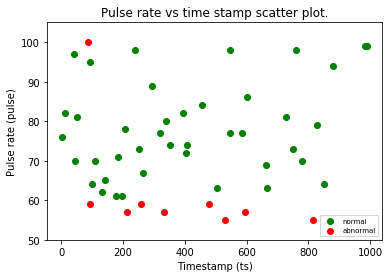

In [9]:
#2c) 
#scatter of 2a: timestamp vs abnormal and normal pulse rates.
x = []
y = []

x1 = []
y1 = []

for key in scatter_data: 
    if scatter_data[key][2] >= 60 and scatter_data[key][2] <=99:
        x.append(key)
        y.append(scatter_data[key][2])
    else:
        x1.append(key)
        y1.append(scatter_data[key][2])


plt.scatter(x,y, color = 'green', label = 'normal')
plt.scatter(x1,y1, color = 'red', label = 'abnormal')
plt.xlabel('Timestamp (ts)')
plt.ylabel('Pulse rate (pulse)')
plt.legend(loc="lower right", prop = {'size':7})
plt.ylim(50, 105)

#plt.plot(figsize=[40,40])#to change figure size
plt.title("Pulse rate vs time stamp scatter plot.")

plt.show()

b) Present a frequency histogram of pulse rates.

o Select a small sample e.g. 50 records, find the frequency for pulse rate

values. Example output could be: [[55,2],[56,6],[57,4],[59,12],...]

In [10]:
def frequencyAnalytics(adict1,n):
    start = time.time()
    rand.seed(404)
    dictwo = {}
    mydict2 = {}
    segment = len(adict1)-1
    mylst = []

    #add keys and values of randomly selected keys (ts) from inputted dictionary (adict1) into 'dictwo' until length
    #is n. This overcomes the chance of duplicate random keys being generated, thus reducing the no. of total records selected. 
    while len(dictwo)!= n:
         key=int(rand.random()*segment)
         value= adict1[key]
         dictwo[key] = value
    
    print('There are '+ str(len(dictwo))+ ' samples selected.') #to check contents of dictwo

    for key in dictwo:
        key  = dictwo[key][2] #dictwo[key][2] is pulse value
        value = 1
        if key in mydict2: #if key is already in mydict2, then +=1 value of that key.
            mydict2[key] +=1
        else: 
            mydict2[key]=value #if key is not in mydict2, then create new pulse key with value 1. 
            
    #print(mydict2) 
    
    #Histogram plot for 2b.
    #store data from dictwo into lists y_abnormal and y_normal to plot for histogram.
    y_abnormal = [] 
    y_normal= []

    #loops through dictwo to seperate pulse rates into 'normal' and 'abnormal' data groups for histo. 
    for key in dictwo:
        key  = dictwo[key][2] #dictwo[key][2] is pulse value
    
        if key >=60 and key <=99: #if pulse is between these 'normal' values then append to this dict.
            y_normal.append(key)
        else: 
            y_abnormal.append(key) # pulse is therefor in the abnormal range so is appended to this dict. 


    bins = [50,60,70,80,90,100,110]

    plt.hist([y_abnormal,y_normal], bins, histtype = 'bar', rwidth = 0.95, color = ['r','g'], label=['abnormal','normal'])

    plt.xlabel('Pulse rate ranges(pulse)')
    plt.ylabel('Frequency(n)')
    plt.legend()
    plt.title("Pulse frequency histogram of sample chosen from abnormalSignAnalytics.")

    plt.show()
    
    end = time.time()
    t = (end-start) #add benchmark times to alist. 
    print('Time taken to run function: '+ str(t) + ' '+'seconds') 
    return mydict2 #shows key as pulse rates, value as frequency of occurance. 

There are 100 samples selected.


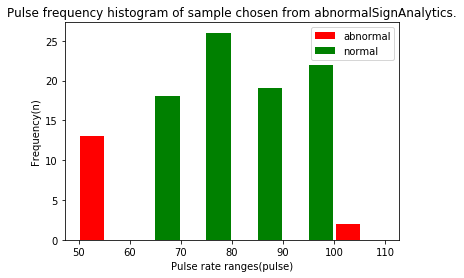

Time taken to run function: 0.3816220760345459 seconds
{100: 2, 72: 3, 76: 2, 95: 4, 57: 5, 82: 3, 64: 2, 94: 1, 63: 3, 59: 3, 55: 3, 61: 3, 77: 4, 73: 2, 71: 2, 65: 3, 62: 1, 74: 2, 67: 1, 70: 6, 80: 1, 78: 1, 81: 2, 99: 3, 98: 4, 86: 5, 79: 1, 89: 1, 69: 1, 97: 1, 84: 1, 75: 3, 92: 3, 66: 1, 85: 2, 83: 3, 56: 2, 93: 4, 60: 1, 68: 2, 96: 1, 87: 1, 90: 1}


In [11]:
frequencydict = frequencyAnalytics(mydict,100)
print(frequencydict)

In [12]:
dictwo = {}

def frequencyAnalytics2(adict1,n):
    start = time.time()
    rand.seed(404)

    mydict2 = {}
    segment = len(adict1)-1
    mylst = []

    #add keys and values of randomly selected keys (ts) from inputted dictionary (adict1) into 'dictwo' until length
    #is n. This overcomes the chance of duplicate random keys being generated, thus reducing the no. of total records selected. 
    while len(dictwo)!= n:
         key=int(rand.random()*segment)
         value= adict1[key]
         dictwo[key] = value
    
    print('There are '+ str(len(dictwo))+ ' samples selected.') #to check contents of dictwo

    for key in dictwo:
        key  = dictwo[key][2] #dictwo[key][2] is pulse value
        value = 1
        if key in mydict2: #if key is already in mydict2, then +=1 value of that key.
            mydict2[key] +=1
        else: 
            mydict2[key]=value #if key is not in mydict2, then create new pulse key with value 1. 
            
    #print(mydict2) 
    
    end = time.time()
    t = (end-start) #add benchmark times to alist. 
    print('Time taken to run function: '+ str(t) + ' '+'seconds') 
    return mydict2 #shows key as pulse rates, value as frequency of occurance. 

In [13]:
frequencydict2 = frequencyAnalytics2(mydict,100)
print(frequencydict2)

There are 100 samples selected.
Time taken to run function: 0.0004799365997314453 seconds
{100: 2, 72: 3, 76: 2, 95: 4, 57: 5, 82: 3, 64: 2, 94: 1, 63: 3, 59: 3, 55: 3, 61: 3, 77: 4, 73: 2, 71: 2, 65: 3, 62: 1, 74: 2, 67: 1, 70: 6, 80: 1, 78: 1, 81: 2, 99: 3, 98: 4, 86: 5, 79: 1, 89: 1, 69: 1, 97: 1, 84: 1, 75: 3, 92: 3, 66: 1, 85: 2, 83: 3, 56: 2, 93: 4, 60: 1, 68: 2, 96: 1, 87: 1, 90: 1}


In [14]:
def frequencyAnalyticsHisto(adict):  
    start = time.time()
    #Histogram plot for 2b.
    #store data from dictwo into lists y_abnormal and y_normal to plot for histogram.
    y_abnormal = [] 
    y_normal= []

    #loops through dictwo to seperate pulse rates into 'normal' and 'abnormal' data groups for histo. 
    for key in dictwo:
        key  = dictwo[key][2] #dictwo[key][2] is pulse value
    
        if key >=60 and key <=99: #if pulse is between these 'normal' values then append to this dict.
            y_normal.append(key)
        else: 
            y_abnormal.append(key) # pulse is therefor in the abnormal range so is appended to this dict. 


    bins = [50,60,70,80,90,100,110]

    plt.hist([y_abnormal,y_normal], bins, histtype = 'bar', rwidth = 0.95, color = ['r','g'], label=['abnormal','normal'])

    plt.xlabel('Pulse rate ranges(pulse)')
    plt.ylabel('Frequency(n)')
    plt.legend()
    plt.title("Pulse frequency histogram of sample chosen from abnormalSignAnalytics.")

    plt.show()
    
    end = time.time()
    t = (end-start) #add benchmark times to alist. 
    print('Time taken to run function: '+ str(t) + ' '+'seconds') 

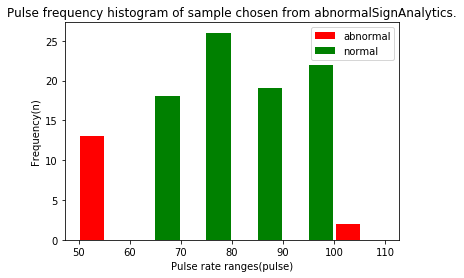

Time taken to run function: 0.2788691520690918 seconds
None


In [15]:
print(frequencyAnalyticsHisto(dictwo))

2c) As seen in the histogram for (2b), there appears to be a random but slight normal distribution where majority of the pulse rates is between 60 and 99. The most common pulse rates in that sample seem to be between 75 and 80. There was only 1 record with pulse rate of 100. A total of 8 abnormal records and 42

This algorithm utillises a linear search which has a time complexity worst case scenario of O(n) which is fair. There are a few 'for loops' used but nothing more complicated (e.g. nested for loops) that would increase the time complexity. 

A random function is used to generate random numbers, within range of the amount of samples generated in phase 1, to choose n number of time stamps to use as records. 

Space complexity is very minimal as most of the data printed is stored in a dictionary where by keys are the 'pulse rates' and values are the frequency of occurances. Many small lists are also used within the functions. 

Although binary search would have produced a lower time complexity of O(logn), Logarithmic time, it would require a sort algorithm to achieve this as the keys in the dictionary are not ordered. If I were to implement the lowest time complexity sort algorithm explored in lectures (Mergesort or Timsort) they at best would provide a time complexity of O(nlogn) and O(n) respectively. However, a worst case scenario of O(nlogn) which is worse than my current time complexity. 



Phase 3: Search for heart rates using the HealthAnalyzer (30 marks)

Develop a function called HealthAnalyzer. HealthAnalyzer provides a query mechanism to search for a particular sign value, for example it could search for records where the pulse value is 56.

In [16]:
#Linear search O(n) with Timsort (sorted()), worst case O(nlogn) and best case O(n)
alist = []
def healthAnalyzer(adict,n):
    rand.seed(404)
    start = time.time()
    healthlist=[]
    
#creates a sorted list using list comprehension, in ascending order of their key(ts). 
#sorted function utilises Timsort algorithm.
    sorted_list = [(key, value[0],value[1],value[2],value[3],value[4],value[5],value[6])\
                   for (key, value) in sorted(adict.items())]
    

#linear search of sorted_list, checking if index[3] has a pulse rate of n, if so, append to a healthlist.
    for e in sorted_list: 
        if e[3] == n:
            healthlist.append(e)
    
    if len(healthlist)==0:
        print('Pulse rate not found in records.')
    

    end = time.time()
    t = (end-start) #add benchmark times to alist. 
    print('Time taken to run function: '+ str(t) + ' '+'seconds')
    return healthlist
                       
                           

In [17]:
healthanalyser = healthAnalyzer(mydict, 56) #search for instances where pulse value is 56
print(healthanalyser)

Time taken to run function: 0.0007841587066650391 seconds
[(1, 39, 61, 56, 121, 11, 93, 7.2), (75, 36, 83, 56, 120, 12, 99, 7.2), (126, 37, 90, 56, 121, 12, 98, 7.2), (202, 39, 80, 56, 121, 14, 99, 7.3), (240, 39, 92, 56, 121, 14, 100, 7.4), (310, 37, 84, 56, 121, 13, 96, 7.5), (337, 36, 70, 56, 121, 12, 93, 7.1), (457, 37, 100, 56, 121, 17, 99, 7.3), (514, 39, 76, 56, 121, 11, 93, 7.5), (548, 36, 79, 56, 121, 13, 95, 7.2), (551, 37, 98, 56, 120, 16, 96, 7.5), (575, 36, 78, 56, 121, 15, 93, 7.6), (597, 39, 77, 56, 121, 15, 94, 7.4), (626, 38, 86, 56, 121, 15, 98, 7.1), (673, 38, 76, 56, 121, 12, 95, 7.2), (700, 38, 89, 56, 120, 12, 95, 7.2), (740, 38, 83, 56, 120, 15, 97, 7.3), (756, 37, 84, 56, 120, 16, 98, 7.4), (786, 39, 70, 56, 120, 15, 93, 7.4), (808, 37, 82, 56, 121, 17, 98, 7.4), (929, 38, 76, 56, 120, 16, 95, 7.2), (964, 38, 82, 56, 121, 14, 96, 7.4)]


3b) The complexity of healthAnalyzer: Timsort function is used so time complexity worst case O(nlogn) and best case O(n), space complexity O(n).

I also use a linear search algorithm which has a worst case O(n) time complexity. 

Overall, worstcase O(nlogn).

However, if the outputted multidimensional list is not required to be ordered then healthAnalyser2 which only uses a linear search would have a lower complexity of O(n). 

<function matplotlib.pyplot.show(*args, **kw)>

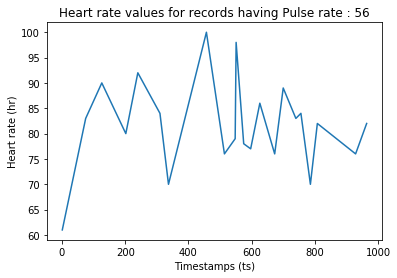

In [19]:
#3c Plotting the heartrate values for records having pulserate 56.
rand.seed(404)
pulse = []
hr = []
ts  = []

for i in healthanalyser: 
    hr.append(i[2]) #index[2] is heart rate for each record.
    ts.append(i[0]) #index[0] is time stamp.

x = ts
y = hr


plt.plot(x,y)
plt.xlabel("Timestamps (ts)")
plt.ylabel("Heart rate (hr)")
plt.title('Heart rate values for records having Pulse rate : 56')
plt.show

In [44]:
#majority of code is from lecture content of PWD. 

def binarySearch(arr, l, r, x):
    start = time.time()
    while l <= r:

        mid = int(l + (r - l) / 2);

        # Check if x is present at mid
        if arr[mid] == x:
            return mid

            # If x is greater, ignore left half
        elif arr[mid] < x:
            l = mid + 1

        # If x is smaller, ignore right half
        else:
            r = mid - 1

    # If we reach here, then the element
    # was not present
    return -1
    end = time.time()
    t = (end-start) #add benchmark times to alist. 
    print('Time taken to run function: '+ str(t) + ' '+'seconds')


In [45]:
#Binary search O(logn) best case scenario.

def healthAnalyzer2(adict,value):
    rand.seed(404)
    start = time.time()
    #healthlist=[]
    l = ''
    r = ''
#creates a sorted list using list comprehension, in ascending order of their key / ts. 
#sorted function utilises Timsort algorithm.

# using sorted() and lambda to sort dictionary value list. Sort by index[3] which is pulse rate value.  
    r=[]
    sorted_list = [(key, value[0],value[1],value[2],value[3],value[4],value[5],value[6])\
                   for (key, value) in sorted(adict.items())
                  ]
    sorted_list.sort(key = lambda sorted_list: sorted_list[3])
    m = [p for p in sorted_list]
    v = [sorted_list[i][3] for i in range(len(sorted_list))]
    while value in v:
        i=binarySearch(v,0,len(v),value)
        r.append(m.pop(i))
        v.pop(i)
    return(r)
    
    
    binary
    end = time.time()
    t = (end-start) #add benchmark times to alist. 
    print('Time taken to run function: '+ str(t) + ' '+'seconds')
# def binSearch(collection, left, right, key):
#     """Takes collection for a SORTED collection, in ascending order and determines whether key belongs to it.
#     Implements the in operator of python
#     left and right are the boundaries of the segment to be searched"""
# e.g. sorted_list, 0, len(sorted_list), key[3]==55??

print(healthAnalyzer2(mydict, 56))

[(202, 39, 80, 56, 121, 14, 99, 7.3), (240, 39, 92, 56, 121, 14, 100, 7.4), (310, 37, 84, 56, 121, 13, 96, 7.5), (337, 36, 70, 56, 121, 12, 93, 7.1), (457, 37, 100, 56, 121, 17, 99, 7.3), (514, 39, 76, 56, 121, 11, 93, 7.5), (548, 36, 79, 56, 121, 13, 95, 7.2), (551, 37, 98, 56, 120, 16, 96, 7.5), (575, 36, 78, 56, 121, 15, 93, 7.6), (597, 39, 77, 56, 121, 15, 94, 7.4), (626, 38, 86, 56, 121, 15, 98, 7.1), (126, 37, 90, 56, 121, 12, 98, 7.2), (673, 38, 76, 56, 121, 12, 95, 7.2), (700, 38, 89, 56, 120, 12, 95, 7.2), (740, 38, 83, 56, 120, 15, 97, 7.3), (756, 37, 84, 56, 120, 16, 98, 7.4), (786, 39, 70, 56, 120, 15, 93, 7.4), (808, 37, 82, 56, 121, 17, 98, 7.4), (929, 38, 76, 56, 120, 16, 95, 7.2), (964, 38, 82, 56, 121, 14, 96, 7.4), (1, 39, 61, 56, 121, 11, 93, 7.2), (75, 36, 83, 56, 120, 12, 99, 7.2)]


Phase 4: Testing scalibility of your algorithm.

a) Create a function benchmarking

In [108]:
alist=[] 
lst1 = [1000,2500,5000,7500,10000] #generating n instances from myHealthCare function
def benchmarking():
    
    import time
    
    for i in lst1:
        start = time.time()
        _=myHealthcare(i)
        end = time.time()
        alist.append(end-start) #add benchmark times to alist. 
    
    return alist
#varying runtimes for same sample (n) due to the speed of electrons (electricity)

In [109]:
print(benchmarking())
#nvalues = [1000,2500,5000, 7500, 10000]


[0.01545095443725586, 0.039411306381225586, 0.09513401985168457, 0.09292006492614746, 0.13114500045776367]


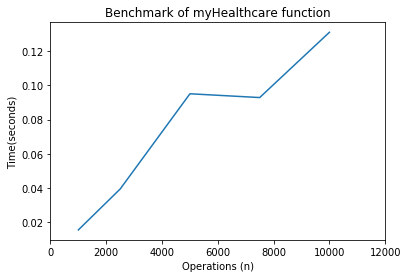

In [110]:
plt.plot(lst1,alist)

# Adding title, axis names and adjusting x-axis limits. 
plt.title('Benchmark of myHealthcare function')
plt.xlabel('Operations (n)')
plt.ylabel('Time(seconds)')
plt.xlim(0,12000)

plt.show()